In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")  #default factory setting
sns.set_context("talk") #to make it presentation friendly

In [2]:
#loading dataset
df = pd.read_csv("../data/raw/synthetic_athlete_dataset.csv")

df.head()  #displaying first 5 rows

,athlete_id,date,height_cm,weight_kg,daily_load,acwr,resting_hr,hrv,sleep_quality,past_injury,days_since_injury,cns_drift_minutes,big_toe_stiffness
0,1,2024-01-01,178.5,68.9,171.1,1.0,58.1,90.3,0.58,0,999,0.8,0
1,1,2024-01-02,178.5,68.9,89.5,1.0,56.9,90.4,0.60,0,999,0.0,0
2,1,2024-01-03,178.5,68.9,70.9,1.0,56.4,91.8,0.62,0,999,0.0,0
3,1,2024-01-04,178.5,68.9,797.6,1.0,62.1,83.3,0.44,0,999,14.1,0
4,1,2024-01-05,178.5,68.9,181.0,1.0,57.9,81.5,0.60,0,999,2.3,0


In [3]:
#stabilising the dataset
df["hrv_z"] = df.groupby("athlete_id")["hrv"].transform(
    lambda x: (x - x.mean()) / x.std()             #z score formula per athlete fov hrv
)
'''
    | `hrv_z` value | Meaning                                                  |
    | ------------- | -------------------------------------------------------- |
    | `0`           | Exactly their average HRV                                |
    | `+1`          | 1 standard deviation **above** normal (well-recovered)   |
    | `-1`          | 1 standard deviation **below** normal (fatigue / stress) |
    | `-2` or less  | unusually low HRV (injury / overtraining risk)           |
'''

'\n    | `hrv_z` value | Meaning                                                  |\n    | ------------- | -------------------------------------------------------- |\n    | `0`           | Exactly their average HRV                                |\n    | `+1`          | 1 standard deviation **above** normal (well-recovered)   |\n    | `-1`          | 1 standard deviation **below** normal (fatigue / stress) |\n    | `-2` or less  | unusually low HRV (injury / overtraining risk)           |\n'

In [4]:
print("Shape of dataset:", df.shape)    #basic info about the dataset
print("\nColumns:")
print(df.columns.tolist())

df.info()

Shape of dataset: (3600, 14)

Columns:
['athlete_id', 'date', 'height_cm', 'weight_kg', 'daily_load', 'acwr', 'resting_hr', 'hrv', 'sleep_quality', 'past_injury', 'days_since_injury', 'cns_drift_minutes', 'big_toe_stiffness', 'hrv_z']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   athlete_id         3600 non-null   int64  
 1   date               3600 non-null   object 
 2   height_cm          3600 non-null   float64
 3   weight_kg          3600 non-null   float64
 4   daily_load         3600 non-null   float64
 5   acwr               3600 non-null   float64
 6   resting_hr         3600 non-null   float64
 7   hrv                3600 non-null   float64
 8   sleep_quality      3600 non-null   float64
 9   past_injury        3600 non-null   int64  
 10  days_since_injury  3600 non-null   int64  
 11  cns_drift_minutes  3600 non-n

In [5]:
df.isna().sum()   #no of nan values in each column

athlete_id           0
date                 0
height_cm            0
weight_kg            0
daily_load           0
acwr                 0
resting_hr           0
hrv                  0
sleep_quality        0
past_injury          0
days_since_injury    0
cns_drift_minutes    0
big_toe_stiffness    0
hrv_z                0
dtype: int64

In [6]:
df.describe().T  #important statistics for numeric features only

,count,mean,std,min,25%,50%,75%,max
athlete_id,3600.0,3.050000e+01,17.320508,1.000000,15.750000,30.500000,45.2500,60.000000
height_cm,3600.0,1.762817e+02,7.218608,161.000000,171.525000,177.250000,180.7000,193.200000
weight_kg,3600.0,6.959500e+01,7.539138,51.900000,65.175000,69.400000,73.7500,85.200000
daily_load,3600.0,3.655435e+02,302.769178,40.500000,132.575000,218.700000,591.8000,1800.000000
acwr,3600.0,9.958750e-01,0.246218,0.350000,0.830000,1.000000,1.1400,2.050000
resting_hr,3600.0,5.780917e+01,6.304850,40.000000,53.600000,57.600000,62.2000,80.000000
hrv,3600.0,3.916850e+01,21.129098,20.000000,21.100000,29.000000,55.0000,105.000000
sleep_quality,3600.0,4.349361e-01,0.098707,0.060000,0.380000,0.440000,0.5000,0.710000
past_injury,3600.0,2.500000e-01,0.433073,0.000000,0.000000,0.000000,0.2500,1.000000
days_since_injury,3600.0,7.958083e+02,353.754552,51.000000,828.750000,999.000000,999.0000,999.000000


In [7]:
print("Unique athletes:", df["athlete_id"].nunique())   #no of unique athletes,if less meodel overfits
print("Date range:", df["date"].min(), "to", df["date"].max())

Unique athletes: 60
Date range: 2024-01-01 to 2024-02-29


In [8]:
df["daily_load_log"] = np.log1p(df["daily_load"])#log transformation of daily_load


In [9]:
df.shape

(3600, 15)

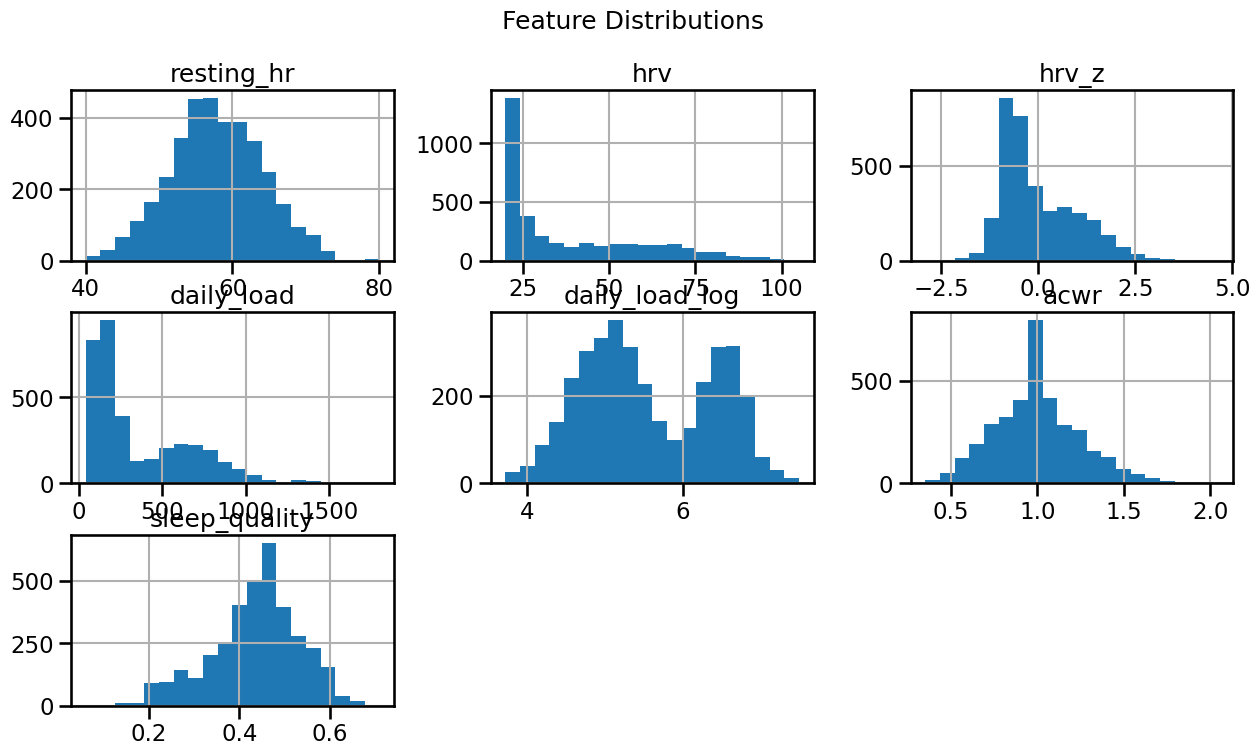

In [10]:
features = [
    "resting_hr",
    "hrv", #not normalised
    "hrv_z",
    "daily_load", #left skewed.Rest days mixed with training days.hence log transformation
    "daily_load_log",
    "acwr",
    "sleep_quality"
]

df[features].hist(figsize=(15, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=18)
plt.show()
# X-axis → feature values,Y-axis → frequency (count of observations)

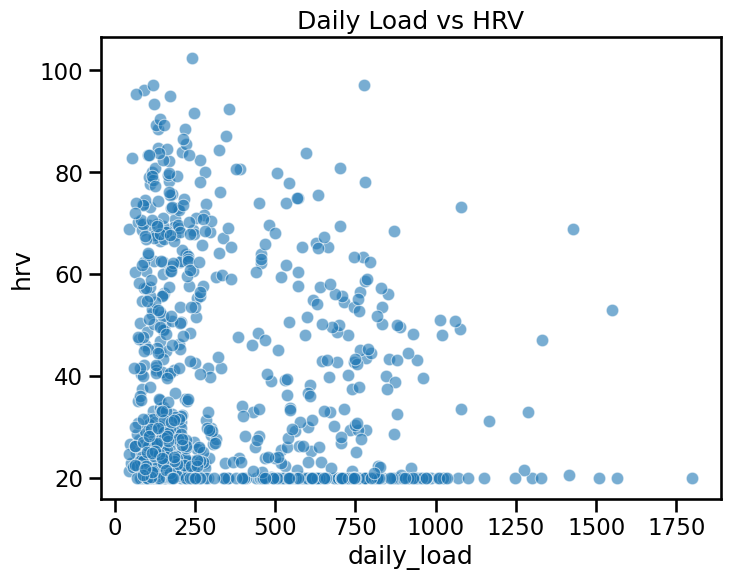

In [11]:
#As training load increases, what happens to HRV?
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df.sample(800),  #800 randoom sample rows
    x="daily_load", #Represents how hard the athlete trained that day
    y="hrv",  #Proxy for recovery / nervous system stress
    alpha=0.6   #transparency of points
)
plt.title("Daily Load vs HRV")
plt.show()

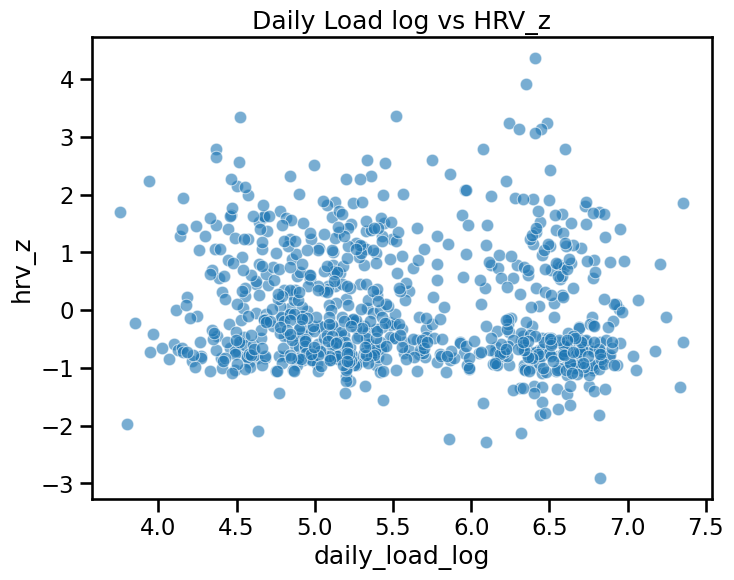

'A cloud with a downward shift\nIncreasing probability of low HRV_z as load increases\nRisk is probabilistic, not deterministic'

In [12]:
#As training load increases, what happens to HRV?(with engineered features)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df.sample(800),  #800 randoom sample rows
    x="daily_load_log", #Represents how hard the athlete trained that day
    y="hrv_z",  #Proxy for recovery / nervous system stress
    alpha=0.6   #transparency of points
)
plt.title("Daily Load log vs HRV_z")
plt.show()

#observation
'''A cloud with a downward shift
Increasing probability of low HRV_z as load increases
Risk is probabilistic, not deterministic'''

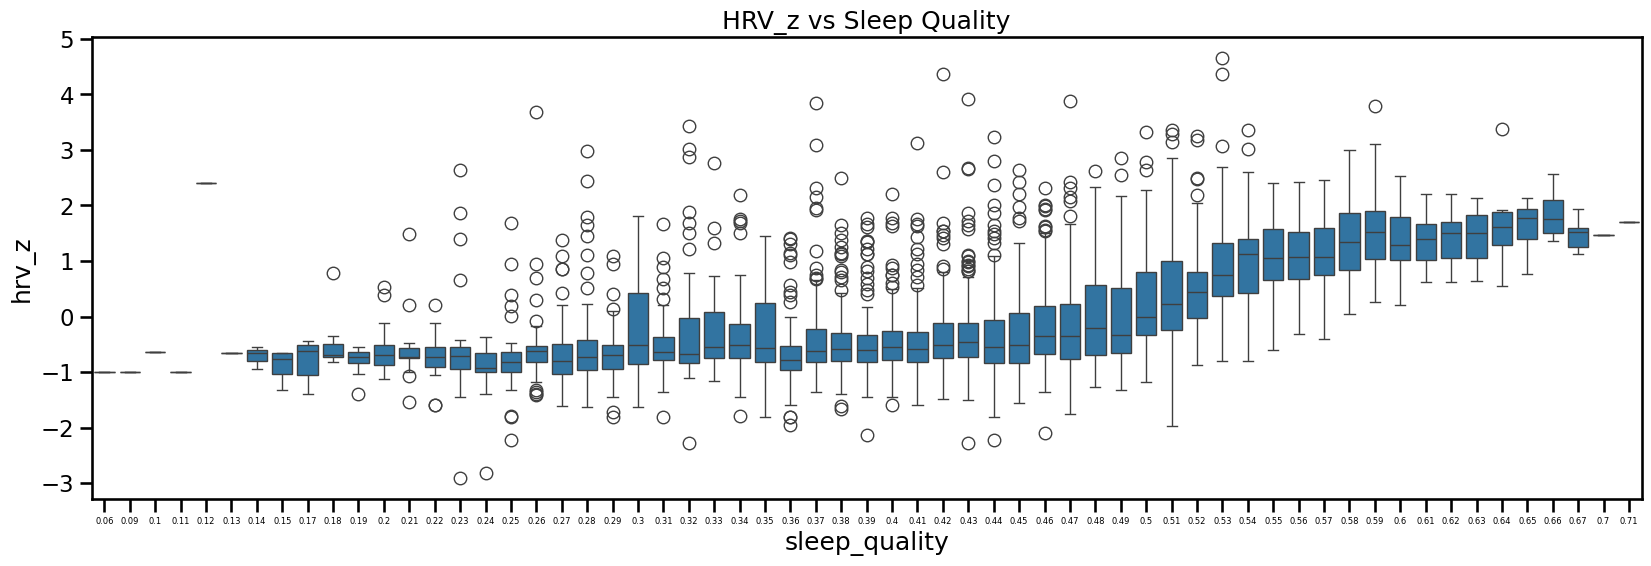

'Better sleep → stronger parasympathetic recovery → higher HRV\nThis validates sleep_quality as a strong feature.'

In [13]:
#Does better sleep quality actually show up in HRV?
#Is sleep_quality actually a useful feature? to consider it
plt.figure(figsize=(20,6))
sns.boxplot(
    data=df,
    x="sleep_quality",
    y="hrv_z"
)
plt.title("HRV_z vs Sleep Quality")
plt.xticks(fontsize=6)
plt.show()

#observation
'''Better sleep → stronger parasympathetic recovery → higher HRV
This validates sleep_quality as a strong feature.'''

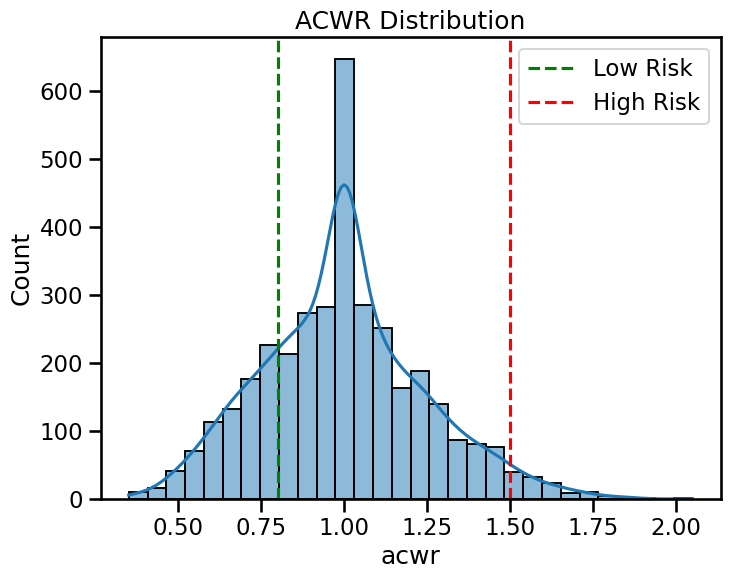

'Most athletes are training at a balanced workload.\nACWR is a strong predictive feature\nThresholds (0.8, 1.5) align with sports science literature'

In [14]:
#To visualize in which workzones does most athletes are in:safe, risky, or extreme workload zones
plt.figure(figsize=(8,6))
sns.histplot(df["acwr"], bins=30, kde=True) #kde for smooth histogram
plt.axvline(0.8, color="green", linestyle="--", label="Low Risk")
plt.axvline(1.5, color="red", linestyle="--", label="High Risk")
plt.legend()
plt.title("ACWR Distribution")
plt.show()

#observation
'''Most athletes are training at a balanced workload.
ACWR is a strong predictive feature
Thresholds (0.8, 1.5) align with sports science literature'''

In [15]:
#How much percentage of athletes had previous injury
df["past_injury"].value_counts(normalize=True) * 100

past_injury
0    75.0
1    25.0
Name: proportion, dtype: float64

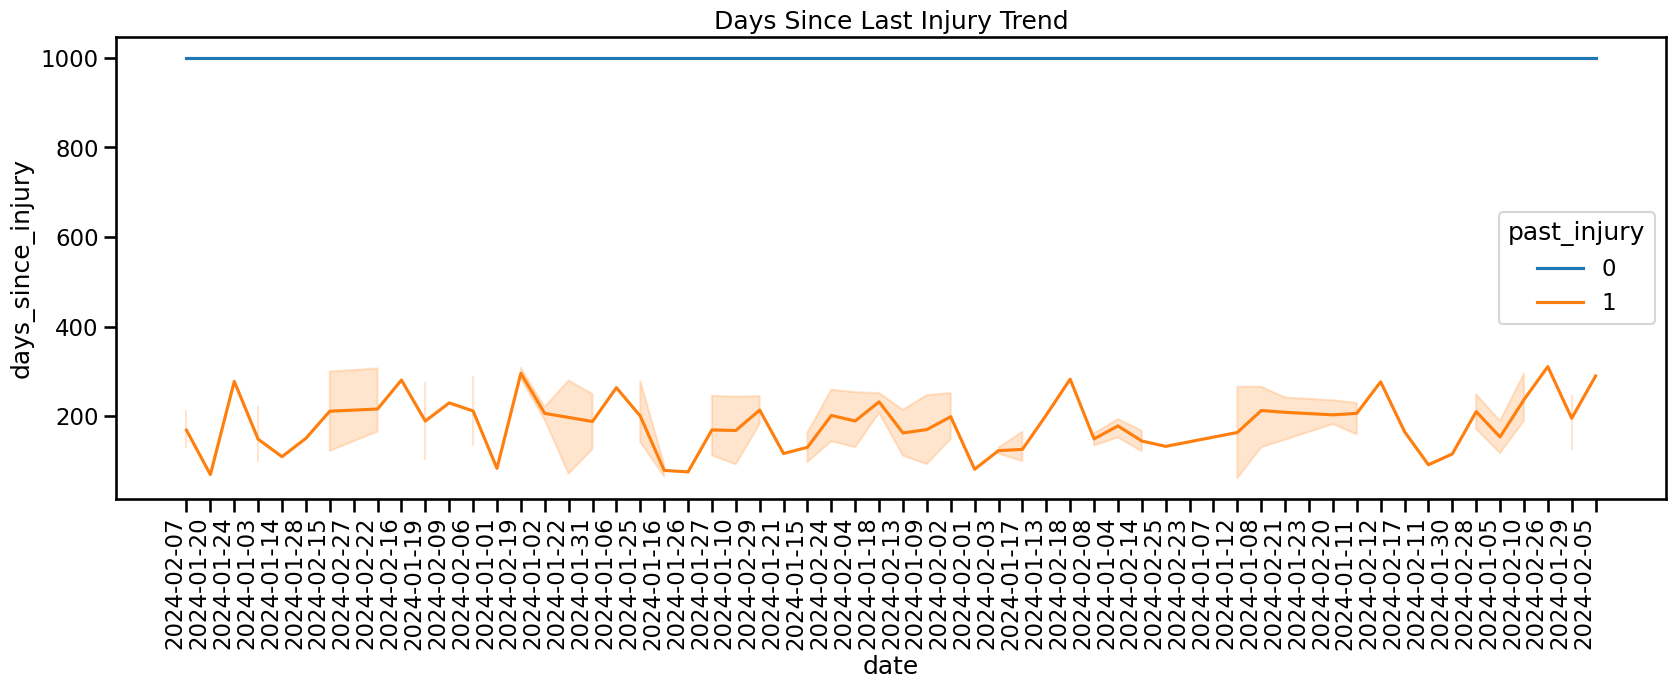

'Drops in the line → injury events\nRising line → recovery over time\nShaded region → different athletes recover at different rates (variability)'

In [16]:
plt.figure(figsize=(20,6))
sns.lineplot(
    data=df.sample(500),
    x="date",
    y="days_since_injury",
    hue="past_injury",
    legend = True
)
plt.title("Days Since Last Injury Trend")
plt.xticks(rotation=90, ha="right")
plt.show()

'''Drops in the line → injury events
Rising line → recovery over time
Shaded region → different athletes recover at different rates (variability)'''

In [17]:
print(df["big_toe_stiffness"].value_counts())

#observation
'''Only a very tiny fraction (9 out of 3600 total samples) do have stiffness.
This is a highly imbalanced feature.
It might not provide much signal because almost everyone has 0'''

big_toe_stiffness
0    3591
1       9
Name: count, dtype: int64


'Only a very tiny fraction (9 out of 3600 total samples) do have stiffness.\nThis is a highly imbalanced feature.\nIt might not provide much signal because almost everyone has 0'

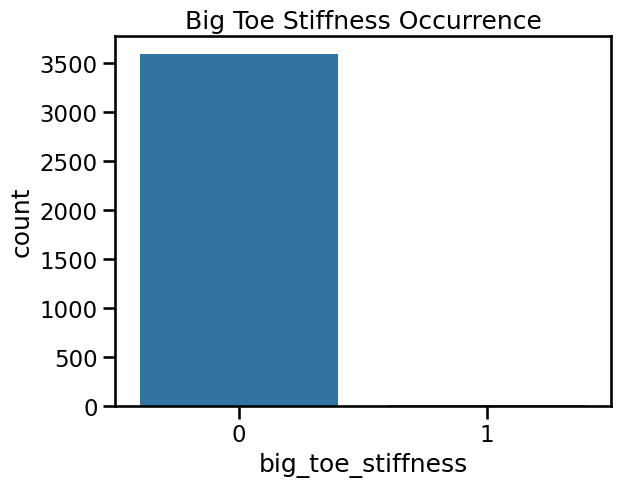

In [18]:
sns.countplot(x="big_toe_stiffness", data=df)
plt.title("Big Toe Stiffness Occurrence")
plt.show()

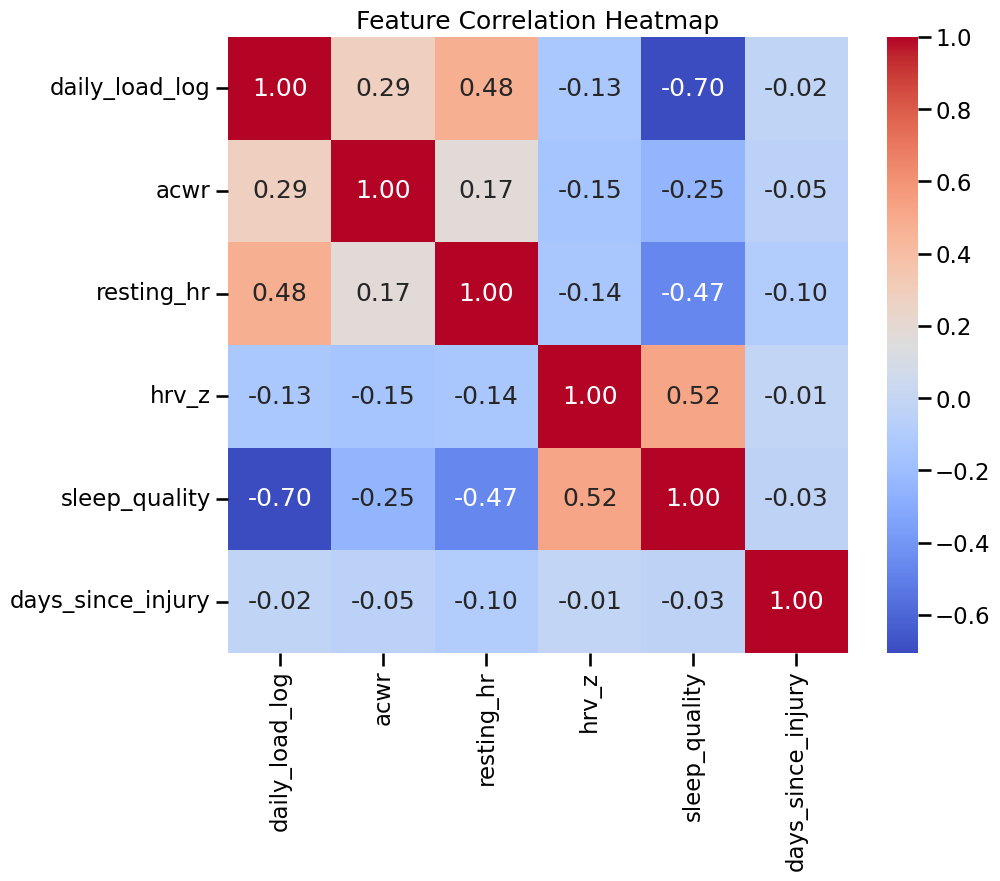

In [19]:
#Correlation measures the linear relationship between two variables
corr_features = [
    "daily_load_log",
    "acwr",
    "resting_hr",
    "hrv_z",
    "sleep_quality",
    "days_since_injury"
]

plt.figure(figsize=(10,8))
sns.heatmap(
    df[corr_features].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
df.to_pickle("base_features.pkl")